[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ryansteed/image-gpt-bias/blob/master/notebooks/simclr.ipynb)

In [1]:
# inspired by 
# https://colab.research.google.com/github/google-research/simclr/blob/master/colabs/finetuning.ipynb#scrollTo=Ih5NlvdDEOI1
# https://github.com/sayakpaul/SimCLR-in-TensorFlow-2/blob/master/Linear_Evaluation_Imagenet_Subset.ipynb
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
import tensorflow_hub as hub
import os
from tqdm import tqdm
import numpy as np
import cv2
import matplotlib.pyplot as plt

depth = 50 #50, 101, 152
width = 1 #1, 2, 3
sk = 0 #0, 1

# %cd /Users/steed/caliskan/git/image-gpt-bias

In [2]:
import urllib

# don't share these to Github or elsewhere!
u = "your_username"
p = urllib.parse.quote("your_password")
!git clone --recurse-submodules -j8 https://$u:$p@github.com/$u/image-gpt-bias.git
%cd image-gpt-bias

fatal: destination path 'image-gpt-bias' already exists and is not an empty directory.
/content/image-gpt-bias


In [72]:
# note - you may need to restart the kernel for these installations to take effect
!pip install -e .
!pip install -e weat

Obtaining file:///content/image-gpt-bias
  Found existing installation: ieat 1.0
    Can't uninstall 'ieat'. No files were found to uninstall.
  Running setup.py develop for ieat
Obtaining file:///content/image-gpt-bias/weat
  Found existing installation: weat 1.0
    Can't uninstall 'weat'. No files were found to uninstall.
  Running setup.py develop for weat


In [3]:
hub_path = f"gs://simclr-checkpoints/simclrv2/pretrained/r{depth}_{width}x_sk{sk}/hub"
module = hub.Module(hub_path, trainable=False)

In [5]:
# preprocess images
test_dir = "data/experiments/weapon"
image_paths = [os.path.join(test_dir, d, f) for d in os.listdir(test_dir) for f in os.listdir(os.path.join(test_dir, d))]
image_paths[0]

'data/experiments/weapon/tool/bottle.jpg'

100%|██████████| 44/44 [00:00<00:00, 77.06it/s]

(44, 224, 224, 3)


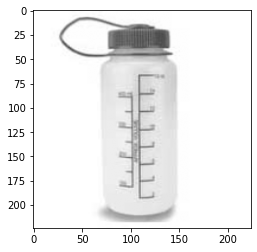

In [7]:
# need some help on turning these into tensors for preprocessing
# using https://github.com/sayakpaul/SimCLR-in-TensorFlow-2/blob/master/SimCLR_ImageNet_Subset.ipynb
def prepare_images(image_paths):
    images = []

    for image in tqdm(image_paths):
        image_pixels = plt.imread(image)
        image_pixels = cv2.resize(image_pixels, (224, 224))
        image_pixels = image_pixels/255.

        images.append(image_pixels)

    images = np.array(images)
    print(images.shape)

    return images

images = prepare_images(image_paths)
plt.imshow(images[0])

In [5]:
sess = tf.Session()
images_t = tf.placeholder(tf.float32)
key = module(inputs=images_t, signature="default", as_dict=True)
sess.run(tf.global_variables_initializer())

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [8]:
# get the final average pool
output = sess.run(key, {images_t: images})
output['default'].shape

(44, 2048)

## Debugging Image Processing

In [5]:
!rm embeddings/insect-flower_insect_simclr_50_1x_sk0.csv

In [6]:
from ieat.models import SimCLRExtractor

extractor = SimCLRExtractor("simclr", 50, 1, 0)
extractor.extract_dir("data/experiments/insect-flower/insect", (".jpg", ".jpeg", ".png", ".webp"))

INFO:absl:resolver HttpCompressedFileResolver does not support the provided handle.
INFO:absl:resolver GcsCompressedFileResolver does not support the provided handle.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
img,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
moth2_google.jpg,0.000000,0.000000,0.000000,0.646178,0.010188,0.016254,0.000000,0.401908,0.000000,0.000000,0.001182,0.279316,0.000000,0.000000,0.000000,0.002738,0.000000,0.000000,0.000000,0.002757,0.027110,0.000000,0.137255,0.004722,0.292501,0.005681,0.000000,0.181603,0.177058,0.000000,0.001258,0.038231,0.400858,0.000000,0.040295,0.184972,0.029462,0.030651,0.055115,0.000000,...,0.000000,0.000000,0.099598,0.000000,0.000000,0.0,0.000000,0.000000,0.138741,0.000000,0.000000,0.050421,0.000000,0.077833,0.027890,0.079552,0.000000,0.104736,0.000000,0.361930,0.000000,0.000000,0.026482,0.172287,0.0,0.000000,0.000000,0.011043,0.000000,0.104547,0.016776,0.000000,0.315966,0.167884,0.000000,0.022375,0.000000,0.000000,0.094212,0.000000
roach5_google.jpg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.612522,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.135674,0.000000,0.000000,0.000000,0.305867,0.441373,0.000000,0.000000,0.175259,0.000000,0.029506,0.000000,0.026594,0.018094,0.000000,0.026437,0.315363,0.186120,0.000000,0.036132,0.000000,...,0.000000,0.000000,0.201089,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.186939,0.026880,0.000619,0.000000,0.148121,0.000000,0.013634,0.000000,0.000000,0.083851,0.035810,0.000000,0.017530,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095340,0.000000,0.157273,0.000000,0.000000,0.000000,0.000000,0.475680,0.000000
centipede2_google.jpg,0.000000,0.000000,0.002414,0.000000,0.000000,0.009984,0.033465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.743780,0.000000,0.111244,0.000000,0.005462,0.058789,0.000000,0.000000,0.528505,0.000000,0.000000,0.000000,0.000000,0.024936,0.000000,0.000000,0.180711,0.000000,0.000000,0.000000,0.054783,...,0.000000,0.000000,0.291909,0.177828,0.000000,0.0,0.000000,0.000000,0.028374,0.002167,0.014865,0.000000,0.021979,0.000000,0.157676,0.002999,0.000000,0.000000,0.000000,0.550793,0.000000,0.000000,0.000000,0.910478,0.0,0.000000,0.069969,0.000000,0.107272,0.000000,0.000000,0.000000,0.000000,0.286251,0.000000,0.061896,0.000000,0.000000,0.510511,0.016185
flea3_google.jpg,0.000000,0.000000,0.083049,0.052863,0.000000,0.261470,0.025025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008188,0.000000,0.005045,0.000000,0.000000,0.008919,0.000000,0.043551,0.004958,0.000000,0.163817,0.000000,0.000000,0.411137,0.000000,0.000000,0.000000,0.080101,0.057890,0.000000,0.042296,0.091347,0.018220,0.000000,0.203795,0.000000,...,0.000000,0.006913,0.000000,0.004855,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.051042,0.038235,0.000000,0.014491,0.493037,0.007709,0.000000,0.000000,0.000000,0.562562,0.000000,0.000000,0.000000,0.042418,0.0,0.000000,0.036692,0.050386,0.000000,0.000000,0.000000,0.019836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.851757,0.075797
centipede3_google.jpg,0.000000,0.000000,0.283358,0.205106,0.000000,0.037837,0.000000,0.003951,0.000000,0.000000,0.000000,0.000000,0.000000,0.001176,0.000000,0.000000,0.198131,0.000000,0.000000,0.000000,0.004287,0.028478,0.005691,0.000000,0.467633,0.000000,0.000000,0.194106,0.060698,0.000000,0.000000,0.000000,0.000000,0.050187,0.017205,0.933883,0.000000,0.000000,0.087615,0.000000,...,0.000000,0.000000,0.224053,0.025284,0.000000,0.0,0.012080,0.000000,0.000294,0.000000,0.000000,0.029541,0.000000,0.604409,0.034196,0.000000,0.000000,0.000000,0.149623,0.131621,0.114393,0.000000,0.000000,0.002455,0.0,0.000000,0.031478,0.068791,0.017622,0.000000,0.003580,0.017301,0.0299

data/experiments/insect-flower/insect/centipede4_google.png
insect


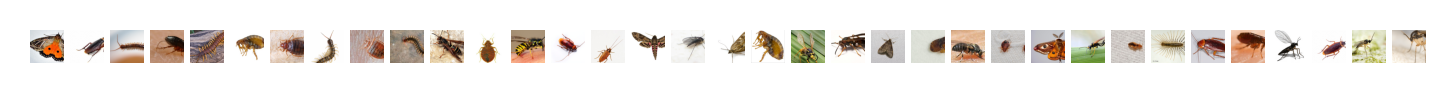

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.000000,0.000000,0.000000,0.646178,0.010188,0.016254,0.000000,0.401908,0.000000,0.000000,0.001182,0.279316,0.000000,0.000000,0.000000,0.002738,0.000000,0.000000,0.000000,0.002757,0.027110,0.000000,0.137255,0.004722,0.292501,0.005681,0.000000,0.181603,0.177058,0.000000,0.001258,0.038231,0.400858,0.000000,0.040295,0.184972,0.029462,0.030651,0.055115,0.000000,...,0.000000,0.000000,0.099598,0.000000,0.000000,0.0,0.000000,0.000000,0.138741,0.000000,0.000000,0.050421,0.000000,0.077833,0.027890,0.079552,0.000000,0.104736,0.000000,0.361930,0.000000,0.000000,0.026482,0.172287,0.0,0.000000,0.000000,0.011043,0.000000,0.104547,0.016776,0.000000,0.315966,0.167884,0.000000,0.022375,0.000000,0.000000,0.094212,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.612522,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.135674,0.000000,0.000000,0.000000,0.305867,0.441373,0.000000,0.000000,0.175259,0.000000,0.029506,0.000000,0.026594,0.018094,0.000000,0.026437,0.315363,0.186120,0.000000,0.036132,0.000000,...,0.000000,0.000000,0.201089,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.186939,0.026880,0.000619,0.000000,0.148121,0.000000,0.013634,0.000000,0.000000,0.083851,0.035810,0.000000,0.017530,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095340,0.000000,0.157273,0.000000,0.000000,0.000000,0.000000,0.475680,0.000000
2,0.000000,0.000000,0.002414,0.000000,0.000000,0.009984,0.033465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.743780,0.000000,0.111244,0.000000,0.005462,0.058789,0.000000,0.000000,0.528505,0.000000,0.000000,0.000000,0.000000,0.024936,0.000000,0.000000,0.180711,0.000000,0.000000,0.000000,0.054783,...,0.000000,0.000000,0.291909,0.177828,0.000000,0.0,0.000000,0.000000,0.028374,0.002167,0.014865,0.000000,0.021979,0.000000,0.157676,0.002999,0.000000,0.000000,0.000000,0.550793,0.000000,0.000000,0.000000,0.910478,0.0,0.000000,0.069969,0.000000,0.107272,0.000000,0.000000,0.000000,0.000000,0.286251,0.000000,0.061896,0.000000,0.000000,0.510511,0.016185
3,0.000000,0.000000,0.083049,0.052863,0.000000,0.261470,0.025025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008188,0.000000,0.005045,0.000000,0.000000,0.008919,0.000000,0.043551,0.004958,0.000000,0.163817,0.000000,0.000000,0.411137,0.000000,0.000000,0.000000,0.080101,0.057890,0.000000,0.042296,0.091347,0.018220,0.000000,0.203795,0.000000,...,0.000000,0.006913,0.000000,0.004855,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.051042,0.038235,0.000000,0.014491,0.493037,0.007709,0.000000,0.000000,0.000000,0.562562,0.000000,0.000000,0.000000,0.042418,0.0,0.000000,0.036692,0.050386,0.000000,0.000000,0.000000,0.019836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.851757,0.075797
4,0.000000,0.000000,0.283358,0.205106,0.000000,0.037837,0.000000,0.003951,0.000000,0.000000,0.000000,0.000000,0.000000,0.001176,0.000000,0.000000,0.198131,0.000000,0.000000,0.000000,0.004287,0.028478,0.005691,0.000000,0.467633,0.000000,0.000000,0.194106,0.060698,0.000000,0.000000,0.000000,0.000000,0.050187,0.017205,0.933883,0.000000,0.000000,0.087615,0.000000,...,0.000000,0.000000,0.224053,0.025284,0.000000,0.0,0.012080,0.000000,0.000294,0.000000,0.000000,0.029541,0.000000,0.604409,0.034196,0.000000,0.000000,0.000000,0.149623,0.131621,0.114393,0.000000,0.000000,0.002455,0.0,0.000000,0.031478,0.068791,0.017622,0.000000,0.003580,0.017301,0.029921,0.000000,0.000000,0.000000,0.054382,0.259816,0.653824,0.000000
5,0.000000,0.000000,0.000000,0.077228,0.000000,0.045389,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [70]:
import torch
import pandas as pd

from ieat.utils import resize

test_dir = "data/experiments/insect-flower/insect"
file_types = (".jpg", ".jpeg", ".png", ".webp")
image_paths = [
  os.path.join(test_dir, f) for f in os.listdir(test_dir)
  if os.path.splitext(f)[1] in file_types
]
# the bug starts here
print(image_paths[7])

output_path = extractor.make_embedding_path(test_dir)
images = []
for image in resize(SimCLRExtractor.n_px, image_paths):
  images.append(image/255)
images = np.array(images)

print(os.path.basename(os.path.dirname(image_paths[0])))
f, axes = plt.subplots(1, len(image_paths), dpi=300)
for img, ax in zip(images, axes):
  ax.axis('off')
  ax.imshow(img)
plt.show()

pd.DataFrame(
  extractor._extract_context(images, False)
)